<a href="https://colab.research.google.com/github/Vishalini0221/DV-ASSIGNMENTS/blob/main/Stirling_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALIZING WATER BODIES AND GREEN SPACES ON A MAP**

1.Importing libraries:

In this code, two libraries are used


*  geopandas to load a GeoJSON dataset
*  folium to create an interactive map

2.Function Definition:







   ```python
   def create_map(gdf):
   ```
   The function is defined with one parameter, `gdf`, which is expected to be a GeoDataFrame.

3.Folium Map Initialization:
   ```python
   my_map = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=12)
   ```
   A Folium map (`my_map`) is initialized with a center location set to the mean latitude (`gdf.geometry.centroid.y.mean()`) and mean longitude (`gdf.geometry.centroid.x.mean()`) of the GeoDataFrame. The `zoom_start` parameter is set to 12, determining the initial zoom level of the map.

4.Return the Map:
   The function doesn't explicitly return anything, but it could be modified to include a `return my_map` statement if the intention is to use the map object outside the function.





5.File Path Specification:
   ```python
   file_path = '/Stirling.geojson'  # Update with your actual file path
   ```
  

6.Reading into GeoDataFrame:
   ```python
   gdf = gpd.read_file(file_path)
   ```
   This line utilizes the GeoPandas `read_file` function to read the GeoJSON file or shapefile located at the specified `file_path` into a GeoDataFrame (`gdf`). The GeoDataFrame is a tabular data structure that includes spatial information, facilitating the handling and analysis of geographic data.
















In [ ]:
import geopandas as gpd
import folium

# Function to create a folium map with markers
def create_map(gdf):
    # Create a folium map centered around the centroid of the GeoDataFrame
    my_map = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=12)

    # Add markers for water bodies (blue) and green spaces (green)
    for index, row in gdf.iterrows():
        color = 'blue' if row['natural'] == 'water' else 'green'
        popup_text = f"{row['natural']}: {row['name']}" if 'name' in row else row['natural']
        folium.Marker(location=[row.geometry.centroid.y, row.geometry.centroid.x], popup=popup_text, icon=folium.Icon(color=color)).add_to(my_map)

    # Display the map
    return my_map

# Replace 'your_file_path' with the path to your GeoJSON file or shapefile
file_path = '/Stirling.geojson'  # Update with your actual file path
gdf = gpd.read_file(file_path)

# Create a folium map with markers
my_map = create_map(gdf)

# Display the map
my_map

<ipython-input-1-52402e688a85>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  my_map = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=12)


**VISUALIZING WATERBODIES AND GREENSPACES ON A PIE CHART AND BAR CHART**

1. Importing Libraries:

In this code, three libraries are used


1.  geopandas
2.Matplotlib
3.Seaborn

2.Loading GeoJSON:

We start by loading a GeoJSON dataset. Make sure to replace 'export.geojson' with the path or URL of your dataset.



3.Creating bar chart:

Use seaborn countplot to visualize the distribution of water bodies and green spaces

4.Creating pie chart:

Calculate the value counts for each 'type' and plot as a pie chart

5.Display:

plt.show() is used to display both charts









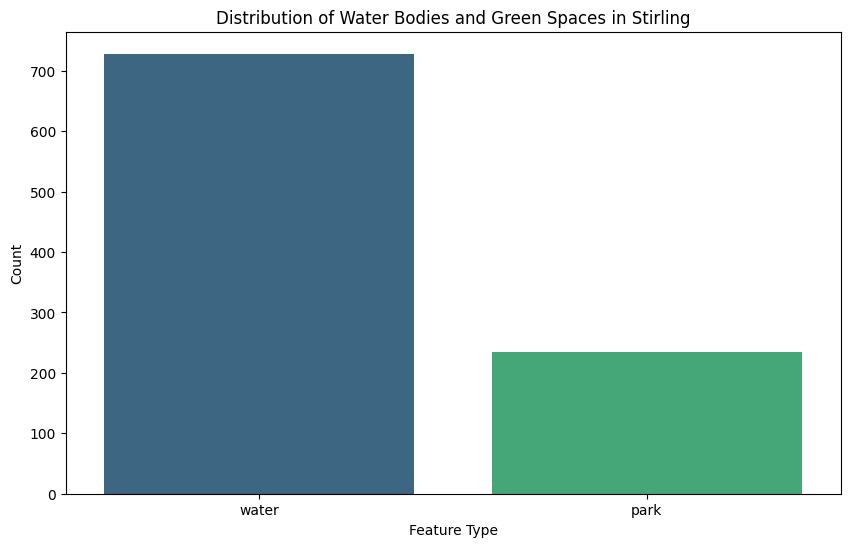

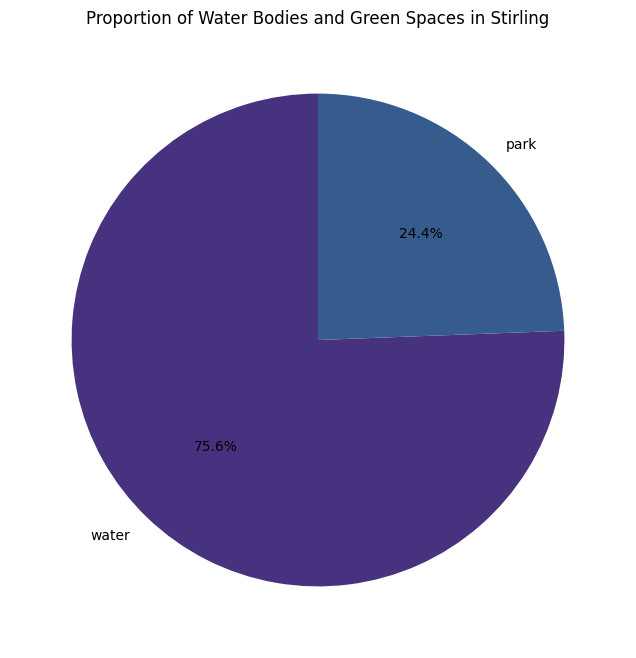

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load GeoJSON data
file_path = '/content/Stirling.geojson'  # Update with your actual file path
gdf = gpd.read_file(file_path)

# Plot a bar chart of water bodies vs green spaces
plt.figure(figsize=(10, 6))
gdf['type'] = gdf['natural'].fillna('park')  # Assume unspecified areas are parks
sns.countplot(x='type', data=gdf, palette='viridis')
plt.title('Distribution of Water Bodies and Green Spaces in Stirling')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.show()

# Plot a pie chart of the same data
plt.figure(figsize=(8, 8))
gdf['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Proportion of Water Bodies and Green Spaces in Stirling')
plt.ylabel('')
plt.show()
